In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
a = pd.read_csv("Mall_Customers.csv")

In [3]:
a.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Create a group of customers as per their annual income and speding score  

In [4]:
a

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
a.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
a.shape

(200, 5)

In [7]:
a.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#Here there is no label is provided so it is known as unsupervisied ML problem statement 
#Work on Annual income and spending 
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
import matplotlib.pyplot as plt

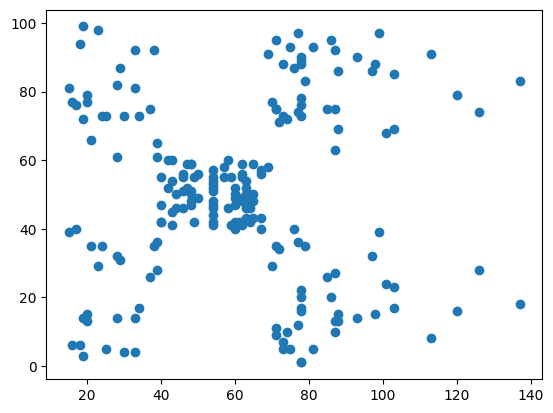

In [16]:
#Do EDA 
#from data points we can say there will be 5 clusters 
plt.scatter(a['Annual Income (k$)'],a['Spending Score (1-100)'])

In [17]:
X=a[['Annual Income (k$)','Spending Score (1-100)','Age']].values

In [18]:
from sklearn.cluster import KMeans

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [19]:
#Select Culster Size as 5; Default is 9; Check with signature Shift + 
model=KMeans(n_clusters=5,random_state=0)

In [20]:
model.fit(X)

KMeans(n_clusters=5, random_state=0)

In [21]:
y=model.predict(X)

In [22]:
#chek clusters as output : IT is showing cluser numbers ; cluster numbers
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [23]:
#check number of values or data points  in each cluster 
#output shows at 0th cluster there are 35 data points, at 1st cluster 81 and so on 
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([39, 36, 23, 25, 77]))

In [24]:
#check for first cluster how many from 0th columns ie Annual Income (k$) 
X[y==0,0]

array([ 69,  70,  71,  71,  71,  72,  73,  73,  74,  75,  76,  77,  77,
        78,  78,  78,  78,  78,  78,  79,  81,  85,  86,  87,  87,  87,
        88,  88,  93,  97,  98,  99, 101, 103, 103, 113, 120, 126, 137])

In [25]:
#check how many from 1st columns ie Spending Score (1-100) 
X[y==0,1]

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83])

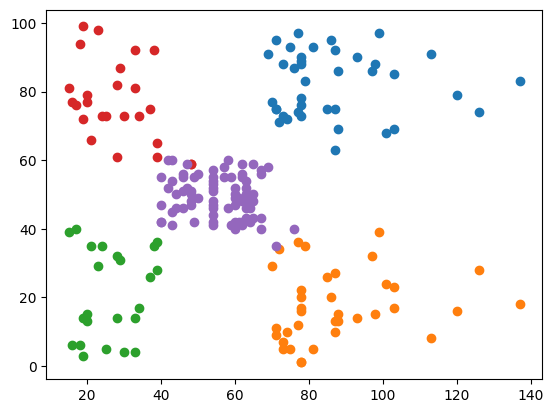

In [26]:
#show clusters combine
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])

In [ ]:
    #Unsupervised matrix does not have accuracy i will have performance 

In [27]:
#show cluster centers or centroid for Annual Income (k$) and Spending Score (1-100)
model.cluster_centers_

array([[86.53846154, 82.12820513, 32.69230769],
       [87.75      , 17.58333333, 40.66666667],
       [26.30434783, 20.91304348, 45.2173913 ],
       [28.04      , 77.        , 24.96      ],
       [55.48051948, 49.32467532, 43.72727273]])

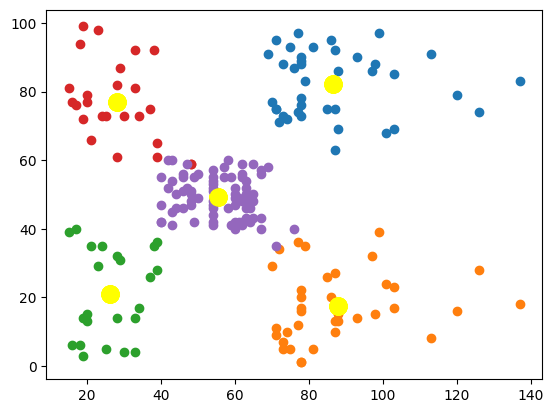

In [28]:
#show clusters combine ; s is usied for size ;s=150
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,color='yellow')

In [29]:
# for runsupervised ML we are using silhouette score -> value b/w -1 to 1
# if silhouette score -> value near to the -1 mean sprawling ( spreading out over)
# if silhouette score  is near to the -1 mean sprawling(spreading out over a large area in an untidy or irregular way),overlapped clusters and 
# if silhouette score  is near 1 means Tight ,well-separated clusters 

from sklearn.metrics import silhouette_score 
silhouette_score(X,y)


0.44045315045641703

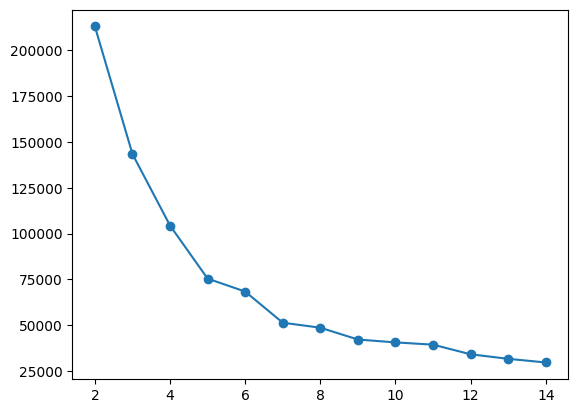

In [30]:
#graph with connecting points 
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

2Cluster,Score0.293166070535953
3Cluster,Score0.3839349967742105
4Cluster,Score0.40546302077733304
5Cluster,Score0.44045315045641703
6Cluster,Score0.41393438783254966
7Cluster,Score0.44201472617197335
8Cluster,Score0.4311648154645911
9Cluster,Score0.39198744474589087
10Cluster,Score0.3759272770829369
11Cluster,Score0.3417524340380071
12Cluster,Score0.38606017142157695
13Cluster,Score0.341141705261341
14Cluster,Score0.33371538720987076


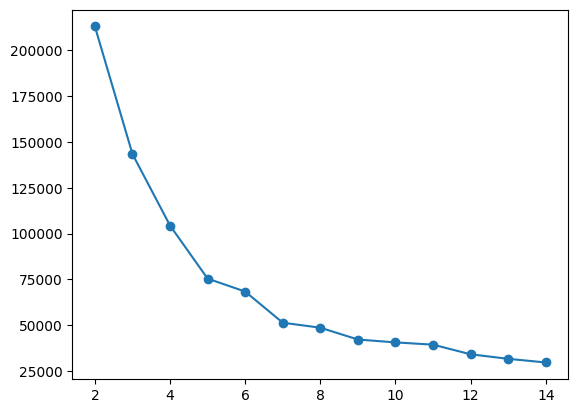

In [31]:
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
    y=demo_model.predict(X)
    print(f"{i}Cluster,Score{silhouette_score(X,y)}")
plt.scatter(k,sse)
plt.plot(k,sse)